1 - Para o problema do decaimento radiativo

Modifique o código para proximar a derivada contínua $d N/ d t$ pela derivada numérica central. Assumindo $\tau = 1$, compare a solução teórica com as soluções numéricas via derivada progressiva e derivada central. Mostre o resultado para diferentes valores de $\Delta t = 0.01, 0.02, 0.04, 0.06, 0.08,0.10$ em um intervalo de tempo $t \in [0,5]$.

Escreva um código para plotar o erro $\Delta_i =  |N_{num}(t_i) - N_{teo}(t_i)|$ e determine o erro integrado $\Delta_{tot} = \sum_i \Delta_i$ para cada uma das duas aproximações de derivada numérica

Compare o erro entre as duas aproximações de derivadas numéricas com um gráfico $\Delta_{tot}~\times~\Delta t$

500


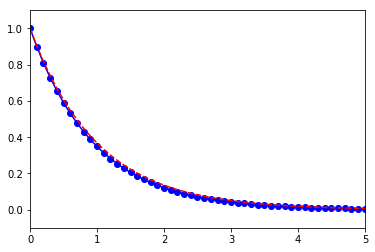

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def fdecay(t,N0,tau):
    return N0*np.exp(-t/tau)

dt = 0.1          
nt = 500          
tau = 1           
N0 = 1           
Tmax = (nt-1)*dt  
time = np.arange(0, Tmax, dt)
decay = np.zeros(nt)
decay[0] = N0
theory = fdecay(time,N0,tau) 

for i in range(1,nt):
     decay[i] = decay[i-1]*(1-dt/tau)
    
plt.plot(time, decay, '-bo',time,theory,'r--')
plt.axis([0, 5*tau, -0.1, 1.1])
plt.show()



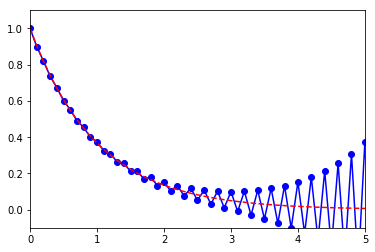

In [7]:
import matplotlib.pyplot as plt
import numpy as np


def fdecay(t,N0,tau):
    return N0*np.exp(-t/tau)

dt = 0.1          
nt = 500          
tau = 1           
N0 = 1           
Tmax = (nt-1)*dt  
time = np.arange(0, Tmax, dt)
decay = np.zeros(nt)
decay[0] = N0
decay[1] = N0*(1-dt/tau)
theory = fdecay(time,N0,tau) 

for i in range(2,nt):
     decay[i] = decay[i-2] - (2*dt*decay[i-1])/tau
        
plt.plot(time, decay, '-bo',time,theory,'r--')
plt.axis([0, 5*tau, -0.1, 1.1])
plt.show()

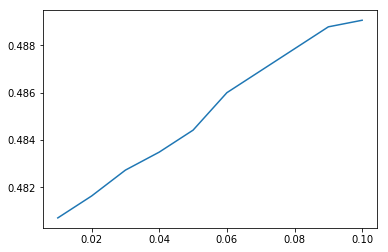

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def fdecay(t,n0,tau):     #Onde t é um vetor.
    return n0*np.exp(-t/tau)

def f_num_p(t,n0,tau):   #Onde t é um vetor.
    dt=t[1]-t[0]
    nt=len(t)
    decay = np.zeros(nt)
    decay[0] = n0
    for i in range(1,nt):
         decay[i] = decay[i-1]*(1-dt/tau)
    return decay


def erro_a_p(t0,tf,dt,n0,tau): #Onde todos são escalares.
    t= np.arange(t0, tf, dt)
    nt=len(t)
    ndecay= f_num_p(t,n0,tau)
    adecay=fdecay(t,n0,tau)
    errop=np.abs(ndecay-adecay)
    erroabs=errop[0]
    for i in range (1,nt):
        erroabs+=errop[i]
    return erroabs



def erp_acm_de_dt(t0,tf,n0,tau,dti,dtf,ndt):
    vdt=np.linspace(dti,dtf,ndt) #vetor de dts
    
    verroabs=np.zeros(ndt)        #vetor erro absoluto referente ao dt do 
                                 #vetor vdt
    for i in range (0,ndt):
        verroabs[i]=erro_a_p(t0,tf,vdt[i],n0,tau)
    return verroabs

#Variáveis da questão
tau=1; t0=0 ; tf=5*tau; n0=1; dti=0.01; dtf=0.10; ndt=10

vdt=np.linspace(dti,dtf,ndt)
erroacmp=erp_acm_de_dt(t0,tf,n0,tau,dti,dtf,ndt)
plt.plot(vdt,erroacmp)
plt.show()

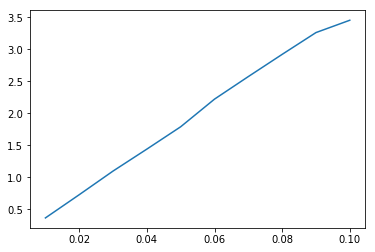

In [4]:
import matplotlib.pyplot as plt
import numpy as np


def fdecay(t,n0,tau):     #Onde t é um vetor.
    return n0*np.exp(-t/tau)

def f_num_c(t,n0,tau):   #Onde t é um vetor.
    dt=t[1]-t[0]
    nt=len(t)
    decay = np.zeros(nt)
    decay[0] = n0
    decay[1] = n0*(1-dt/tau)
    for i in range(2,nt):
        decay[i] = decay[i-2] - (2*dt*decay[i-1])/tau
    return decay

def erro_a_c(t0,tf,dt,n0,tau): #Onde todos são escalares.
    t= np.arange(t0, tf, dt)
    nt=len(t)
    ndecay= f_num_c(t,n0,tau)
    adecay=fdecay(t,n0,tau)
    erroc=np.abs(ndecay-adecay)
    erroabs=erroc[0]
    for i in range (1,nt):
        erroabs+=erroc[i]
    return erroabs

def erc_acm_de_dt(t0,tf,n0,tau,dti,dtf,ndt):
    vdt=np.linspace(dti,dtf,ndt) #vetor de dts
    
    verroabs=np.zeros(ndt)        #vetor erro absoluto referente ao dt do 
                                 #vetor vdt
    for i in range (0,ndt):
        verroabs[i]=erro_a_c(t0,tf,vdt[i],n0,tau)
    return verroabs

#Variáveis da questão
tau=1; t0=0 ; tf=5*tau; n0=1; dti=0.01; dtf=0.10; ndt=10

vdt=np.linspace(dti,dtf,ndt)
erroacmp=erc_acm_de_dt(t0,tf,n0,tau,dti,dtf,ndt)
plt.plot(vdt,erroacmp)
plt.show()

2  (1.4 do livro texto Giordano - Computational physics) - Considere o problema do decaimento radioativo envolvendo dois tipos de núcleos, A e B, com populações $N_{A}$ e $N_{b}$. Suponha que os núcleo tipo A decaiam para formar núcleos do tipo B, que também irão decair, de acordo com as equações diferenciais

$\frac{dN_{A}}{dt}=-\frac{N_{A}}{\tau_{A}}$ 

$\frac{dN_{B}}{dt}=\frac{N_{A}}{\tau_{A}}-\frac{N_{B}}{\tau_{B}}$

onde $\tau_{A}$ e $\tau_{B}$ são constantes de tempo de decaimento(tempos de meia vida) para cada tipo de núcleo. Use o método de Euler para as equações acopladas obtendo $N_{A}(t)$ e $N_{b}(t)$ como funções do tempo. Obtenha a solução analítica para $N_{A}(t)$ e $N_{b}(t)$ e compare com seus resultados numéricos. É também interresante explorar os diferentes comportamentos dos valores da relação $\frac{\tau_{A}}{\tau_{B}}$. Em particular tente interpretar os valores curtos e longos do prazos para diferentes valores da relação.

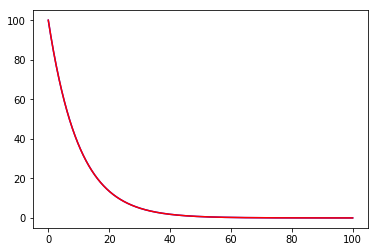

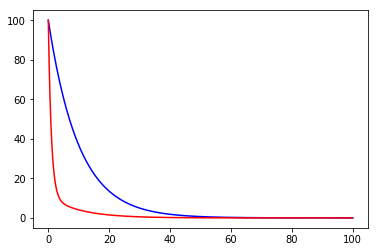

In [42]:
import matplotlib.pyplot as plt
import numpy as np

def fdecay(t,nai,nbi,taua,taub):     #Onde t é um vetor.
    return nai*np.exp(-t/taua) ,  (nbi-nai)*np.exp(-t/taub) + nai*np.exp(-t/taua)

def f_num_p(t,nai,nbi,taua,taub):   #Onde t é um vetor.
    dt=t[1]-t[0]
    nt=len(t)
    num_nuca = np.zeros(nt)        #número de núcleos tipo A
    num_nuca[0] = nai
    num_nucb = np.zeros(nt)        #número de núcleos tipo B
    num_nucb[0] = nbi
    for i in range(1,nt):
        num_nuca[i] = num_nuca[i-1]*(1-dt/taua)
        num_nucb[i] = dt*((num_nuca[i-1]/taua)-(num_nucb[i-1]/taub))+num_nucb[i-1]
    return num_nuca,num_nucb


#n1_nuc , n2_nuc = f_num_p(t,n0,tau)

#------------------------------------------------
#tau_a/tau_b=10
#------------------------------------------------
nai, nbi=100,100
taua,taub =10, 1
t=np.linspace(0,100,10000)

nuc_ana_a, nuc_ana_b = fdecay(t,nai,nbi,taua,taub)
nuc_num_a, nuc_num_b = f_num_p(t,nai,nbi,taua,taub)

plt.plot(t,nuc_ana_a, '-b')
plt.plot(t,nuc_num_a, '-r')
plt.show()

plt.plot(t,nuc_ana_b, '-b')
plt.plot(t,nuc_num_b, '-r')
plt.show()


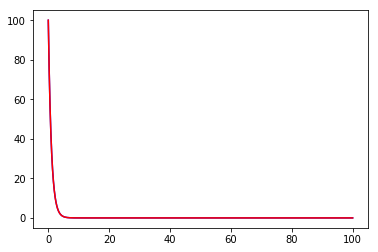

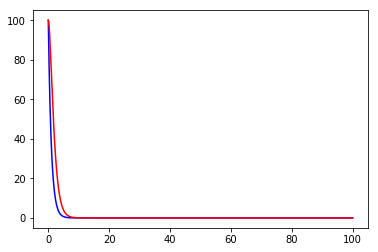

In [43]:
#------------------------------------------------
#tau_a/tau_b=1
#------------------------------------------------
nai, nbi=100,100
taua,taub =1, 1
t=np.linspace(0,100,10000)

nuc_ana_a, nuc_ana_b = fdecay(t,nai,nbi,taua,taub)
nuc_num_a, nuc_num_b = f_num_p(t,nai,nbi,taua,taub)

plt.plot(t,nuc_ana_a, '-b')
plt.plot(t,nuc_num_a, '-r')
plt.show()

plt.plot(t,nuc_ana_b, '-b')
plt.plot(t,nuc_num_b, '-r')
plt.show()


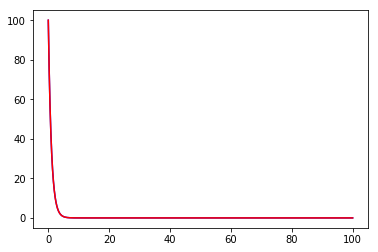

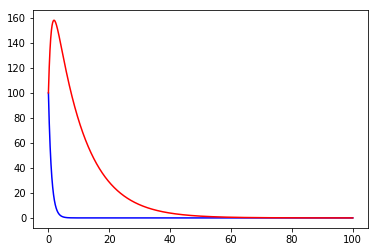

In [44]:
#------------------------------------------------
#tau_a/tau_b=0.1
#------------------------------------------------
nai, nbi=100,100
taua,taub =1, 10
t=np.linspace(0,100,10000)

nuc_ana_a, nuc_ana_b = fdecay(t,nai,nbi,taua,taub)
nuc_num_a, nuc_num_b = f_num_p(t,nai,nbi,taua,taub)

plt.plot(t,nuc_ana_a, '-b')
plt.plot(t,nuc_num_a, '-r')
plt.show()

plt.plot(t,nuc_ana_b, '-b')
plt.plot(t,nuc_num_b, '-r')
plt.show()


3  (1.5 do livro texto Giordano - Computational physics) - Considere novamente um problema de decaimento radioativo com dois tipos de núcleos A e B, mas agora suponha que os núcleos do tipo A decaiam param os núcleos do tipo B, enquanto os núcleos de tipo B decaem para os núcleos de tipo A. Estritamente falado, este não é um processo de "decaimento", uma vez que é possível que os núcleos tipo B voltem a se transformar em núcleos tipo A. Uma analogia melhor seria a ressonância  na qual um sistema poderia ir e voltar entre dois estados A e B com os mesmos valores de energia. As equações de taxa correspondentes são

$\frac{dN_{A}}{dt}=\frac{N_{B}}{\tau}-\frac{N_{A}}{\tau}$

$\frac{dN_{B}}{dt}=\frac{N_{A}}{\tau}-\frac{N_{B}}{\tau}$

onde iremos assumir que os dois decaimentos são caracterizados por apenas uma constante, $\tau$. Resolva este sistema de equações para os números de núcleos, $N_{A}$ e $N_{B}$, como função do tempo. Considere diferentes condições iniciais, tais como $N_{A}=100$, $N_{B}=0$, etc.,e faça $\tau=1s$. Mostre que seus resultados númericos são consistentes com a ideias que o sistema atinge um estado em que $N_{A}$ e $N_{B}$ são constantes. E nessa estabilidade, as derivadas no tempo $\frac{dN_{A}}{dt}$ e $\frac{dN_{B}}{dt}$  deverão ir a zero.